In [1]:
import numpy as np
import MDAnalysis as mda
import nmrformd as nmrmd

/home/simon/.local/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib


In [2]:
import sys, os, git
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
sys.path.append(git_path+"/examples/pyplot-perso/")
from color_series1 import colors
from functions import complete_panel, save_figure, set_boundaries, add_subplotlabels, set_boundaries
path_figures = "/docs/source/figures/illustrations/lennard-jones-fluid/"

In [3]:
from matplotlib import pyplot as plt

In [7]:
all_T = []
all_R1 = []
all_R2 = []
all_gij = []
all_J = []
for T in ["0.6", "0.8", "1.0", "1.2", "1.4", "1.6", "1.8", "2.0", "2.2", "2.4", "2.6", "2.8", "3.0", "3.2"]:
    print(T)
    all_T.append(T)
    datapath = git_path + "/nmrformd-data/lennard-jones-fluid/raw-data/T"+T+"/"
    u = mda.Universe(datapath+"system.data", datapath+"dump.xtc")
    ALL = u.select_atoms("all")
    if (T == "0.8") | (T == "3.0"):
        nmr = nmrmd.NMR(u, atom_group = ALL, number_i=100)
    else:
        nmr = nmrmd.NMR(u, atom_group = ALL, number_i=10)
    all_R1.append(nmr.R1)
    all_R2.append(nmr.R2)
    all_gij.append(nmr.gij)
    all_J.append(nmr.J)
all_T = np.array(np.float32(all_T))

0.6
0.8
1.0
1.2
1.4
1.6
1.8
2.0
2.2
2.4
2.6
2.8
3.0
3.2


In [8]:
# use the point corresponding to f0 = 0.07 (no units)
# or f0 = 150929 megahertz
i = 2
all_R10 = []
for R1 in all_R1:
    all_R10.append(R1[i])
print("actual frequency :", nmr.f[i], "MHz")
all_R20 = []
for R2 in all_R2:
    all_R20.append(R2[i])
all_R10 = np.float32(all_R10)
all_R20 = np.float32(all_R20)

actual frequency : 150843.21356382177 MHz


In [9]:
from scipy import constants as cst
spin = 0.5
GAMMA = 2 * np.pi * 42.6e6
K = (3 / 2) * (cst.mu_0 / 4 / np.pi) ** 2 \
    * cst.hbar ** 2 * GAMMA ** 4 * spin * (1 + spin)  # m6 / s2

In [10]:
R1_grivet = np.loadtxt("Grivet2005/data-R1-R2/R1.dat")
T_grivet, R1_grivet = R1_grivet.T
R1_grivet *= K / (3e-10)**6 * (463.79e-15)
R2_grivet = np.loadtxt("Grivet2005/data-R1-R2/R2.dat")
_, R2_grivet = R2_grivet.T
R2_grivet *= K / (3e-10)**6 * (463.79e-15)

In [ ]:
#  mfc='none', markersize=24, markerfacecolor='white'

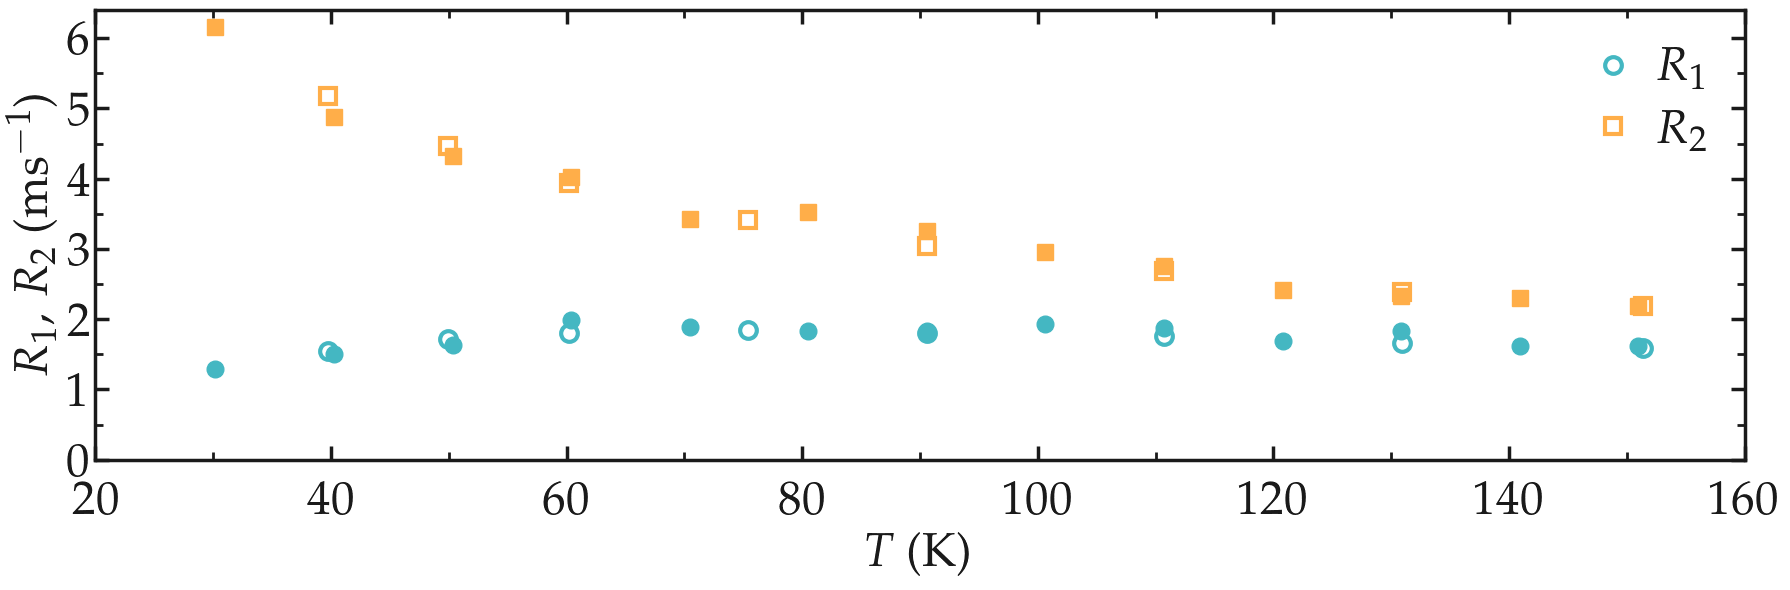

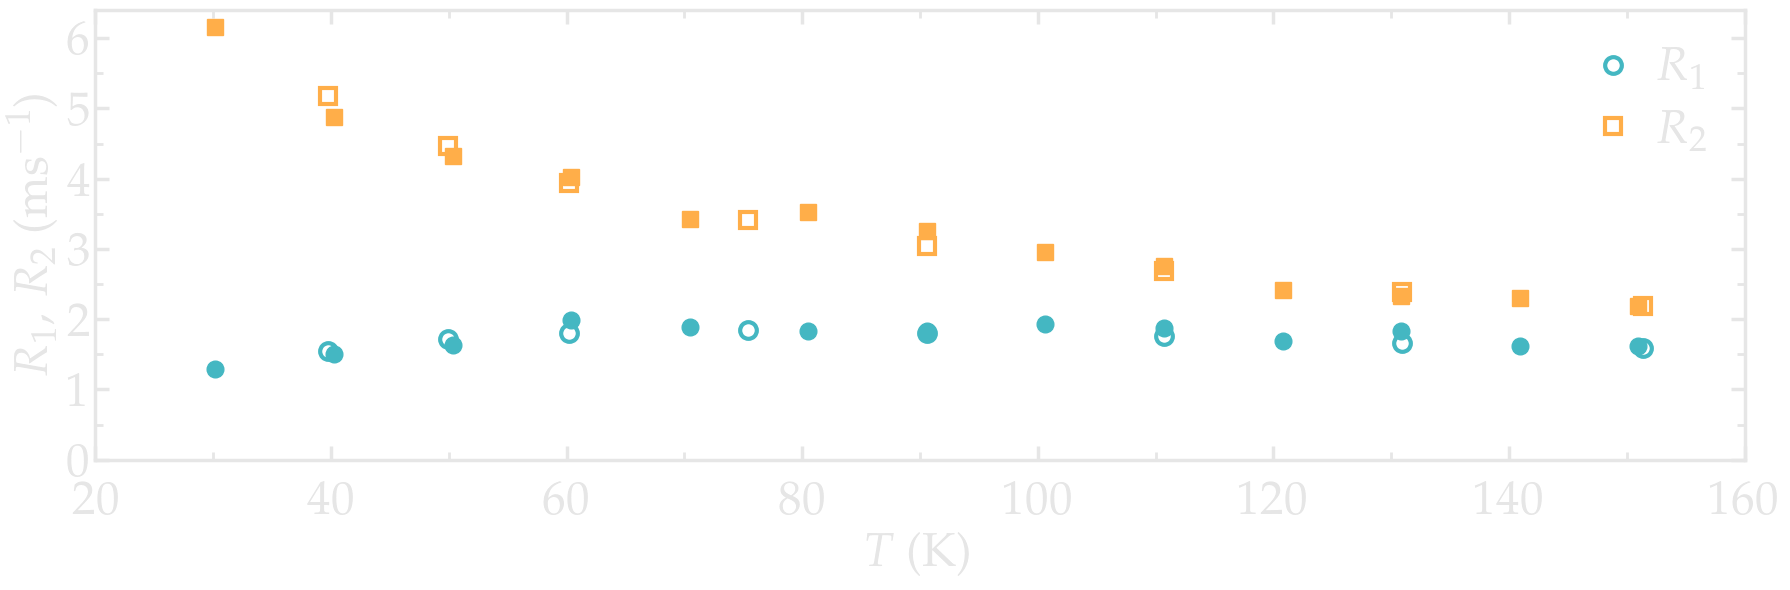

In [18]:
filename = "R1_spectra"
for mode, mygray in zip(['light', 'dark'], [colors["mylightgray"], colors["mydarkgray"]]):    
    fig = plt.figure(figsize=(18,6))
    ax, n, l_tot, c_tot = [], 0, 1, 1
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    ax[-1].plot(all_T*50.32, all_R10*1000, 'o', color=colors["mycyan"],
                markersize = 12, linewidth=4)
    ax[-1].plot(all_T*50.32, all_R20*1000, 's', color=colors["myorange"],
                markersize = 12, linewidth=4)
    ax[-1].plot(T_grivet*50.32, R1_grivet*1000/6, 'o', color=colors["mycyan"], mfc='none', markeredgewidth=3,
                markersize = 12, linewidth=4, label=r'$R_1$')
    ax[-1].plot(T_grivet*50.32, R2_grivet*1000/6, 's', color=colors["myorange"], mfc='none', markeredgewidth=3,
                markersize = 12, linewidth=4, label=r'$R_2$')
    complete_panel(ax[-1], r'$T$ (K)', r'$R_1, \, R_2$ (ms$^{-1}$)', legend=True, axis_color=mygray, xpad=15)
    set_boundaries(plt, x_boundaries=(20, 160), y_boundaries=(0, 6.4)) # x_ticks=np.arange(-1, 0.2, 0.2)
    # add_subplotlabels(fig, ax, ["a", "b"], color=mygray)
    save_figure(fig, mode, git_path, path_figures, filename)

In [19]:
G_grive_08 = np.loadtxt("Grivet2005/data-G/T0.8.dat")
G_grive_30 = np.loadtxt("Grivet2005/data-G/T3.0.dat")

/home/simon/Git/NMR/nmrformd/examples/pyplot-perso/functions.py:119: UserWarning: AutoMinorLocator does not work with logarithmic scale
  fig.tight_layout()
/home/simon/Git/NMR/nmrformd/examples/pyplot-perso/functions.py:121: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(git_root + path_figures + filename + "-light.png",
/home/simon/Git/NMR/nmrformd/examples/pyplot-perso/functions.py:125: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(git_root + path_figures + filename + "-dark.png",
/home/simon/.local/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: AutoMinorLocator does not work with logarithmic scale
  fig.canvas.print_figure(bytes_io, **kw)


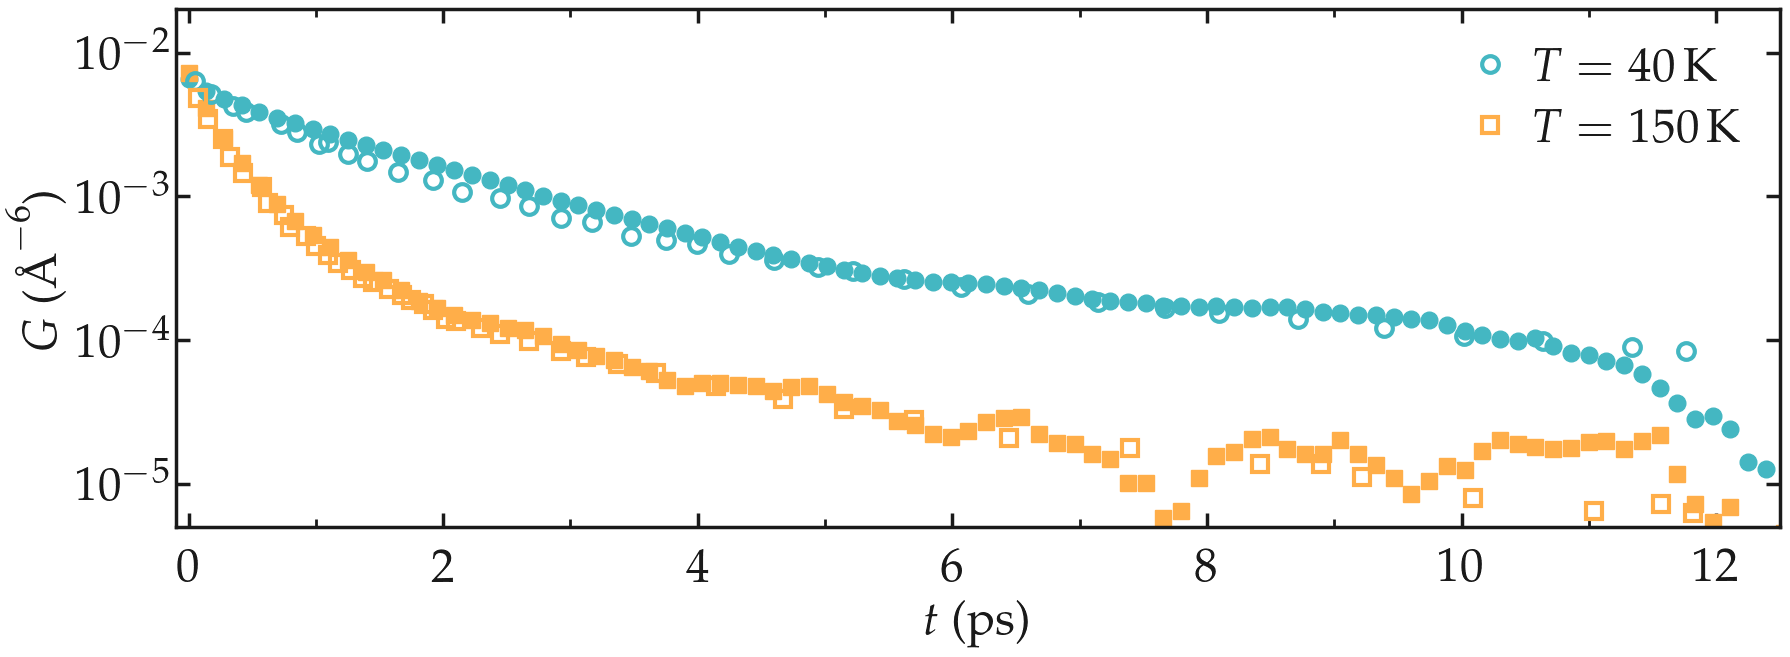

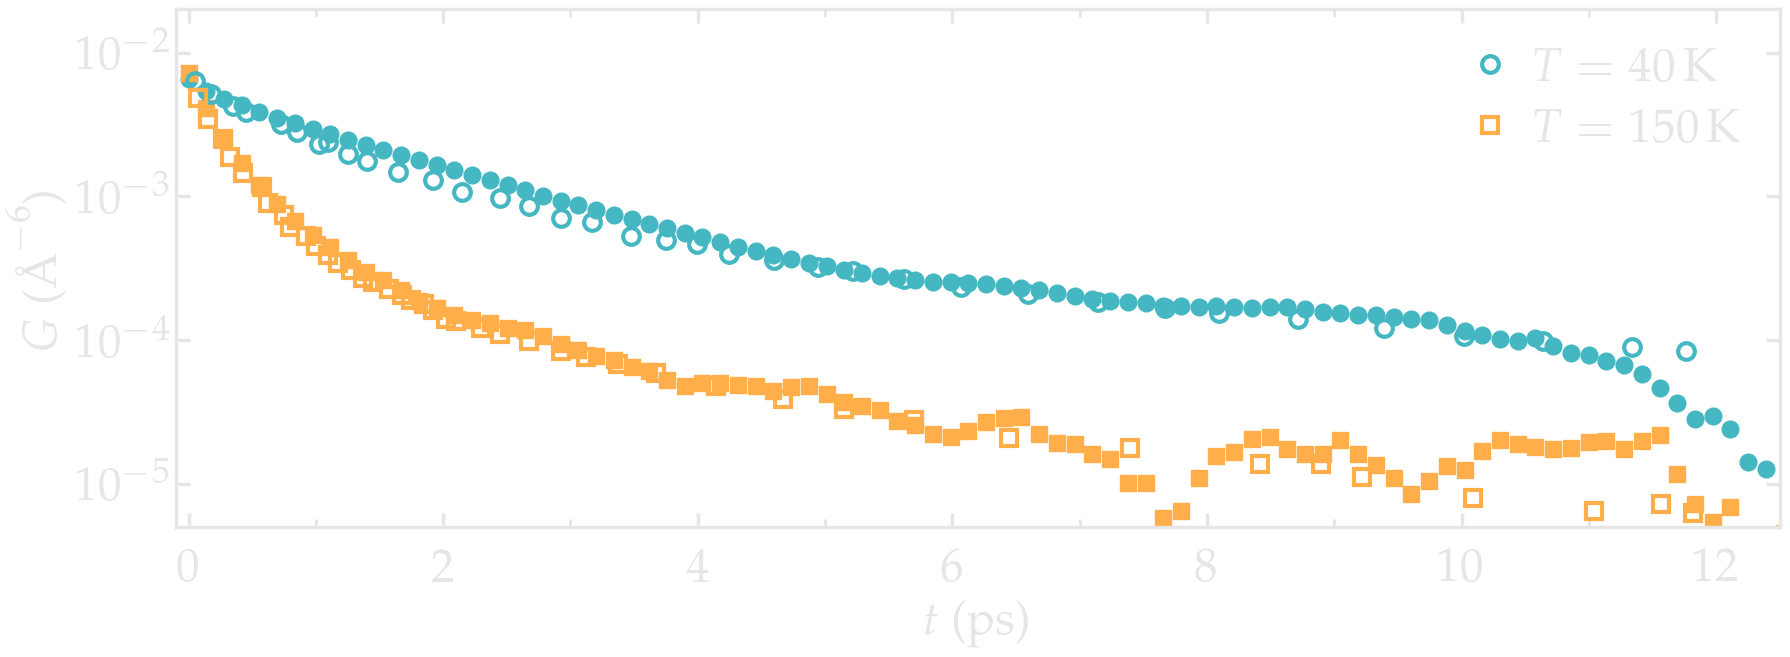

In [27]:
filename = "G_correlation"
sigma = 3 # A
tconvert = 463.79e-15 # s
for mode, mygray in zip(['light', 'dark'], [colors["mylightgray"], colors["mydarkgray"]]):    
    fig = plt.figure(figsize=(18,12))
    ax, n, l_tot, c_tot = [], 0, 2, 1
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    ax[-1].semilogy(nmr.t[::12], all_gij[1][0][::12], 'o', color=colors["mycyan"],
                    markersize = 12, linewidth=4)
    ax[-1].semilogy(nmr.t[::12], all_gij[-2][0][::12], 's', color=colors["myorange"],
                    markersize = 12, linewidth=4)
    ax[-1].semilogy(G_grive_08.T[0]*(tconvert*1e12), G_grive_08.T[1]/(sigma)**6, 'o', mfc='none', markeredgewidth=3,
                    color=colors["mycyan"], markersize = 12, linewidth=4, label=r'$T = 40$\,K')
    ax[-1].semilogy(G_grive_30.T[0]*(tconvert*1e12), G_grive_30.T[1]/(sigma)**6, 's', mfc='none', markeredgewidth=3,
                    color=colors["myorange"], markersize = 12, linewidth=4, label=r'$T = 150$\,K')
    complete_panel(ax[-1], r'$t$ (ps)', r'$G$ ($\textrm{\AA}^{-6}$)', legend=True, axis_color=mygray, xpad=15)
    set_boundaries(plt, x_boundaries=(-0.1, 12.5), y_boundaries=(5e-6, 2e-2)) # x_ticks=np.arange(-1, 0.2, 0.2)
    # add_subplotlabels(fig, ax, ["a", "b"], color=mygray)
    save_figure(fig, mode, git_path, path_figures, filename)